In [1]:
import altair as alt
import cnvutils
import cptac
import IPython.display
import numpy as np
import os
import pandas as pd

from cnvutils.filenames import (
    get_has_event_path,
    get_ttest_results_path,
    get_protein_ttest_boxplot_path,
    get_all_props_path,
    get_props_barchart_path,
)

from cnvutils.constants import (
    CHART_FORMAT,
    CHART_RENDER_METHOD,
    CHART_SCALE,
    SIG_CUTOFF,
)

from cnvutils.load_data import (
    get_cnv_counts,
    get_tables,
    get_ensembl_gene_locations,
    get_ncbi_gene_locations,
)

from cnvutils.chromosome_funcs import (
    select_genes_for_event,
)

In [2]:
def make_props_barchart(
    chromosome,
    arm,
    gain_or_loss,
    cis_or_trans,
    proteomics_or_transcriptomics,
    source,
    level=None,
    data_dir=os.path.join(os.getcwd(), "..", "data"),
):

    all_props = pd.read_csv(get_all_props_path(
        data_dir=os.path.join(os.getcwd(), "..", "data"),
        chromosome=8,
    ), sep="\t")

    df = all_props[
        (all_props["prop_name"] == "sig_prop") &
        (all_props["proteomics_or_transcriptomics"] == proteomics_or_transcriptomics) &
        (all_props["source"] == source) &
        (all_props["level"] == level) &
        (all_props["chromosome"] == chromosome) &
        (all_props["arm"] == arm) &
        (all_props["gain_or_loss"] == gain_or_loss) &
        (all_props["cis_or_trans"] == cis_or_trans)
    ].reset_index(drop=True)
    
    df = df.melt(
        id_vars=[
            "chromosome",
            "arm",
            "gain_or_loss",
            "cis_or_trans",
            "proteomics_or_transcriptomics",
            "cancer_types",
            "source",
            "level",
            "prop_name",
        ],
        var_name="label",
        value_name="prop",
    ).\
    dropna(how="any")
    
    df = df.assign(
        label=df["label"].replace({
            "has_prop": "Has event",
            "not_has_prop": "No event",
        })
    )

    chart = alt.Chart(df).mark_bar().encode(
        x=alt.X(
            "label",
            title=None,
            axis=alt.Axis(
                labels=False,
                ticks=False,
            )
        ),
        y=alt.Y(
            "prop",
            title="Proportion of proteins affected",
            scale=alt.Scale(
                domain=[0, 1],
            ),
        ),
        color=alt.Color(
            "label",
            title=None,
            scale=alt.Scale(
                domain=["Has event", "No event"],
                range=["#2d3da4", "#d1d1d1"]
            ),
        ),
        column=alt.Column(
            "cancer_types",
            title="Cancer type",
        ),
    ).properties(
        title=f"Chromosome {chromosome}{arm} {gain_or_loss} {cis_or_trans} effects proportions",
    ).configure_title(
        anchor="middle",
    ).configure_header(
        titleOrient='bottom',
        labelOrient='bottom',
#         labelAngle=40,
        titlePadding=0,
        labelPadding=10,
#         labelAlign="left",
#         labelAnchor="middle",
    )
    
    save_path = get_props_barchart_path(
        data_dir=data_dir,
        source=source, 
        level=level, 
        chromosome=chromosome, 
        arm=arm, 
        gain_or_loss=gain_or_loss, 
        cis_or_trans=cis_or_trans,
        proteomics_or_transcriptomics=proteomics_or_transcriptomics,
        chart_format=CHART_FORMAT,
    )
    
    chart.save(save_path, method=CHART_RENDER_METHOD, scale_factor=CHART_SCALE)
    
    return save_path

In [3]:
paths = cnvutils.multi_runner(
    func=make_props_barchart,
    sources=["gistic"],
    levels=["gene"],
    chromosomes_events={
        8: {
            "p": ["loss"],
            "q": ["gain"],
        },
    },
    more_dicts=[
        {
            "name": "proteomics_or_transcriptomics",
            "vals": ["proteomics"],
        },
        {
            "name": "cis_or_trans",
            "vals": ["cis", "trans"],
        },
    ]
)

Running make_props_barchart...
Running make_props_barchart...
Running make_props_barchart...
Running make_props_barchart...






INFO:tornado.access:200 GET / (::1) 12.14ms
INFO:tornado.access:200 GET /vega-lite.js (::1) 3.70ms
INFO:tornado.access:200 GET /vega-embed.js (::1) 10.11ms
INFO:tornado.access:200 GET / (::1) 11.63ms
INFO:tornado.access:200 GET /vega.js (::1) 6.46ms
INFO:tornado.access:200 GET /vega-lite.js (::1) 4.87ms
INFO:tornado.access:200 GET /vega-embed.js (::1) 8.91ms
INFO:tornado.access:200 GET / (::1) 19.95ms
INFO:tornado.access:200 GET /vega.js (::1) 7.94ms
INFO:tornado.access:200 GET /vega.js (::1) 4.70ms
INFO:tornado.access:200 GET /vega-lite.js (::1) 4.97ms
INFO:tornado.access:200 GET /vega-embed.js (::1) 10.71ms
INFO:tornado.access:200 GET / (::1) 9.28ms
INFO:tornado.access:200 GET /vega.js (::1) 6.02ms
INFO:tornado.access:200 GET /vega-lite.js (::1) 9.95ms
INFO:tornado.access:200 GET /vega-embed.js (::1) 14.85ms
INFO:tornado.access:200 GET / (::1) 12.14ms
INFO:tornado.access:200 GET /vega-lite.js (::1) 3.70ms
INFO:tornado.access:200 GET /vega-embed.js (::1) 10.11ms
INFO:tornado.access:20

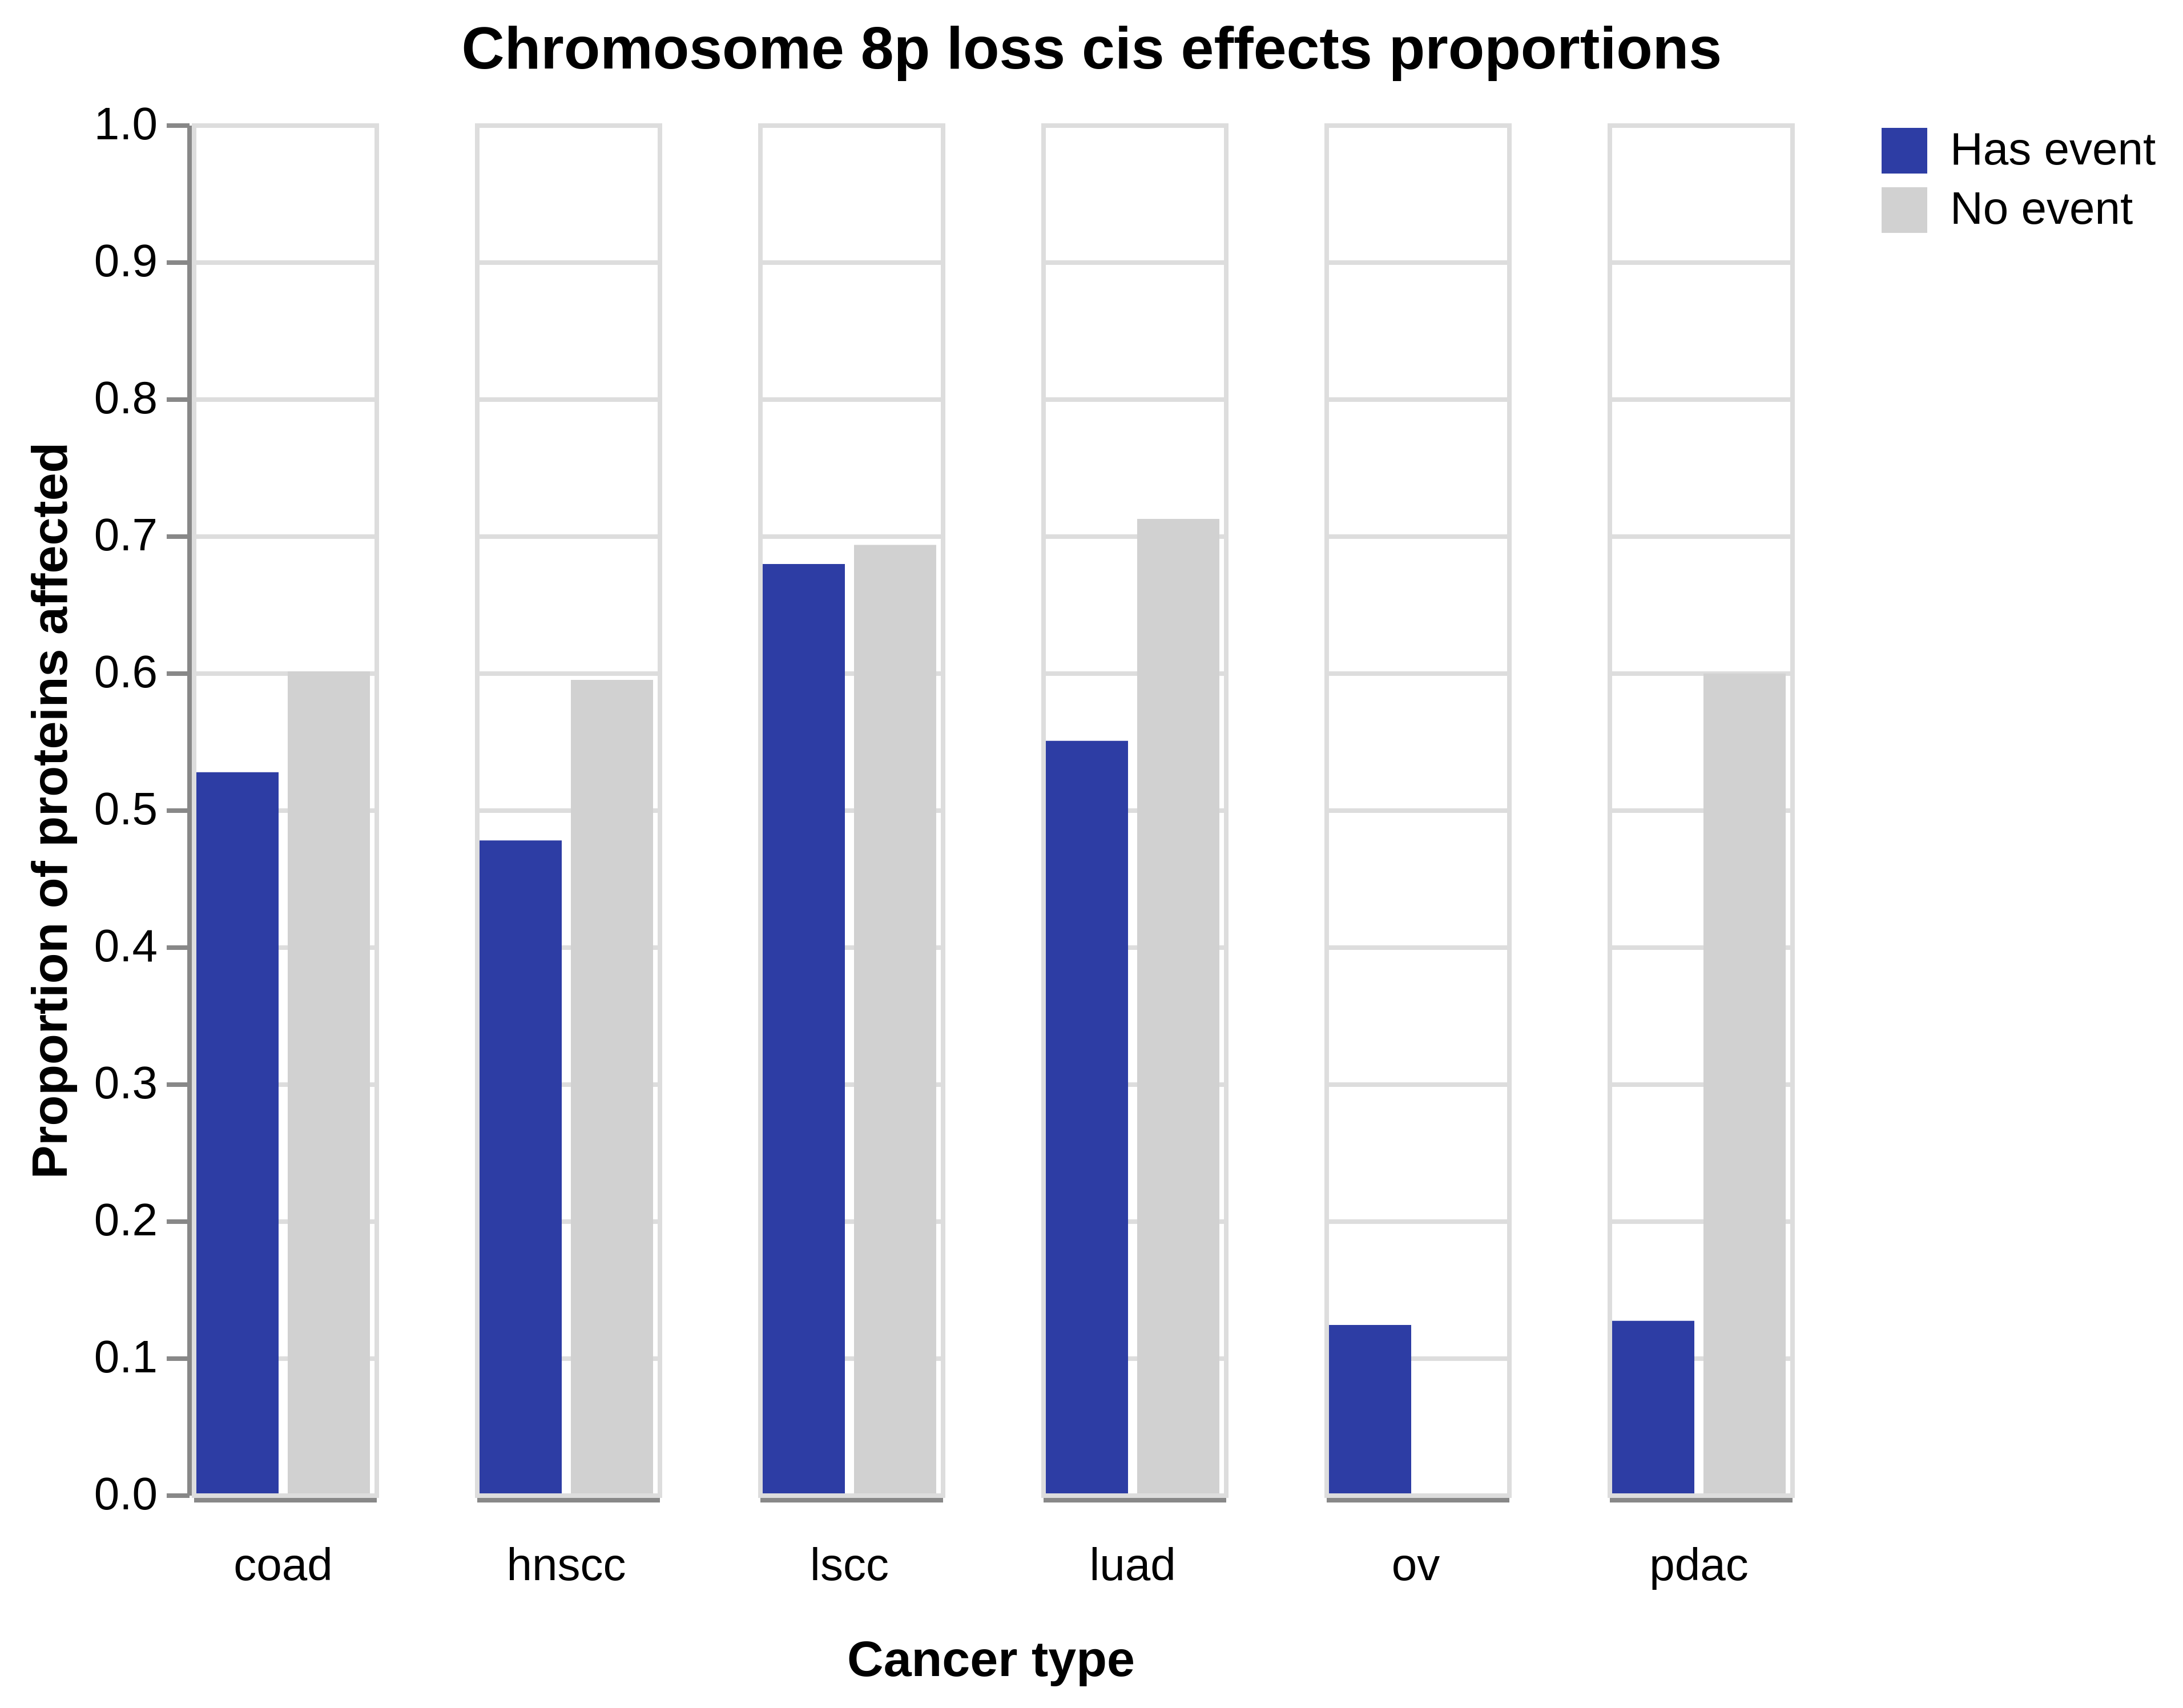

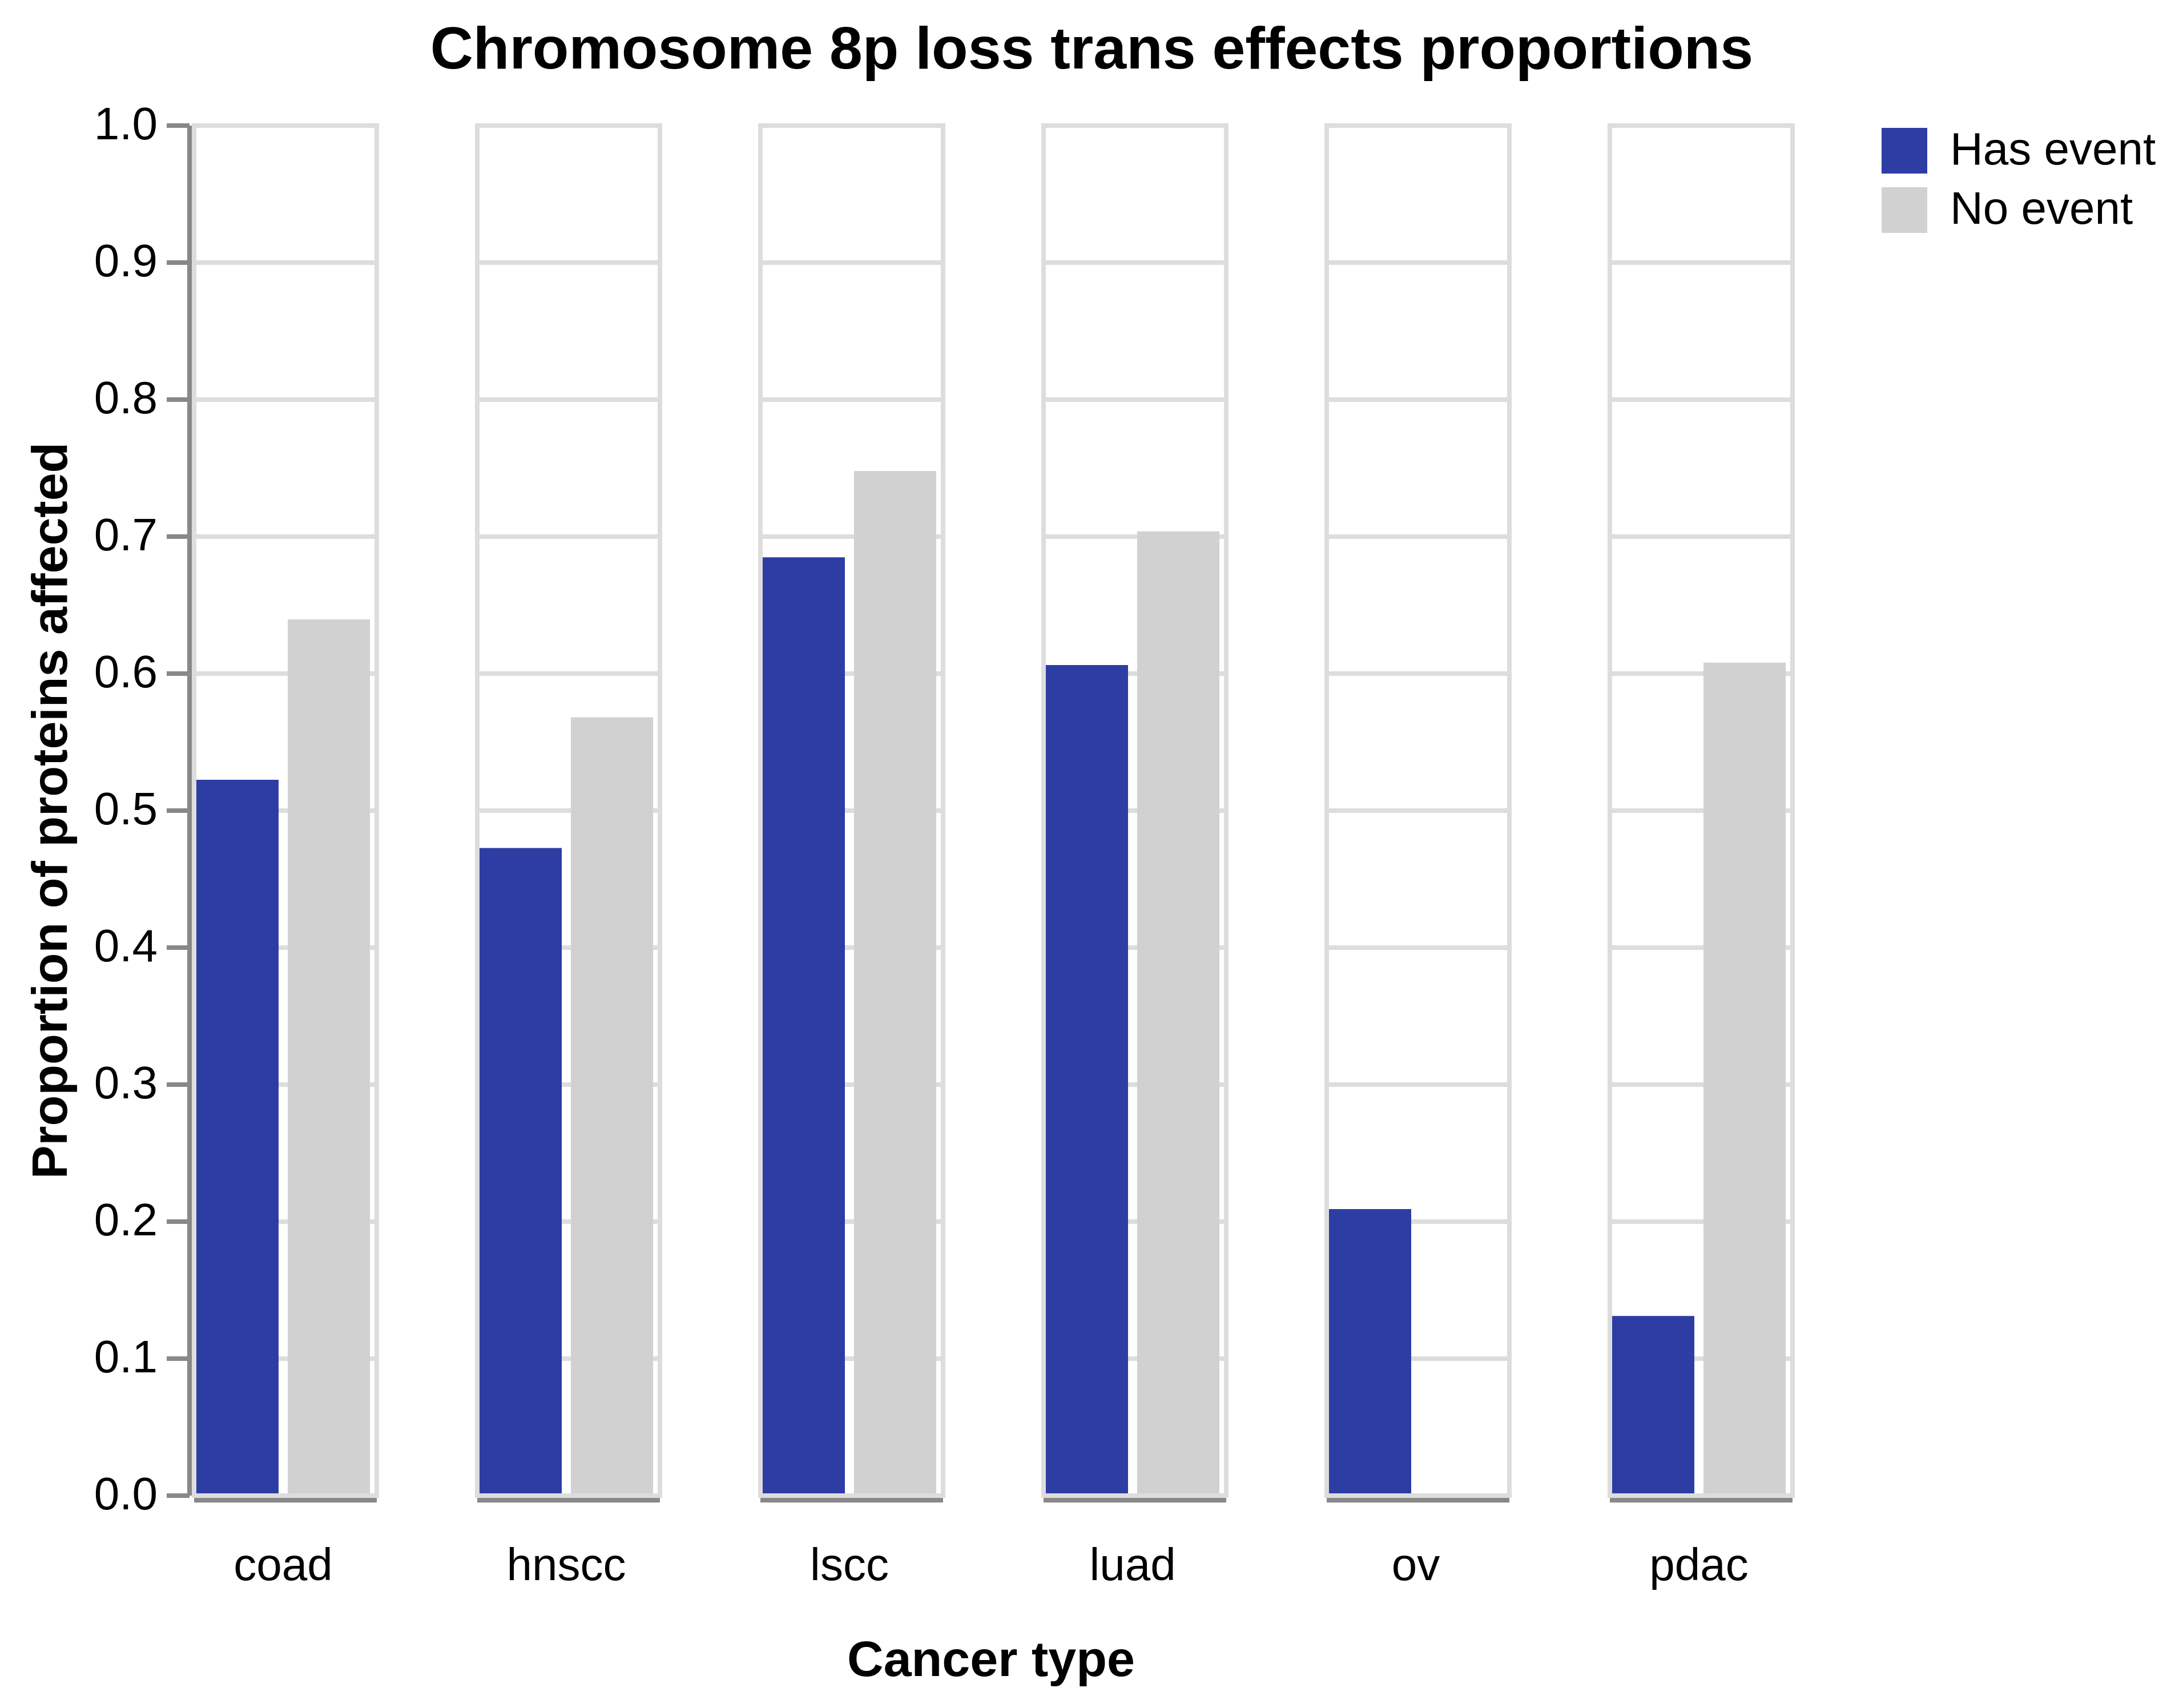

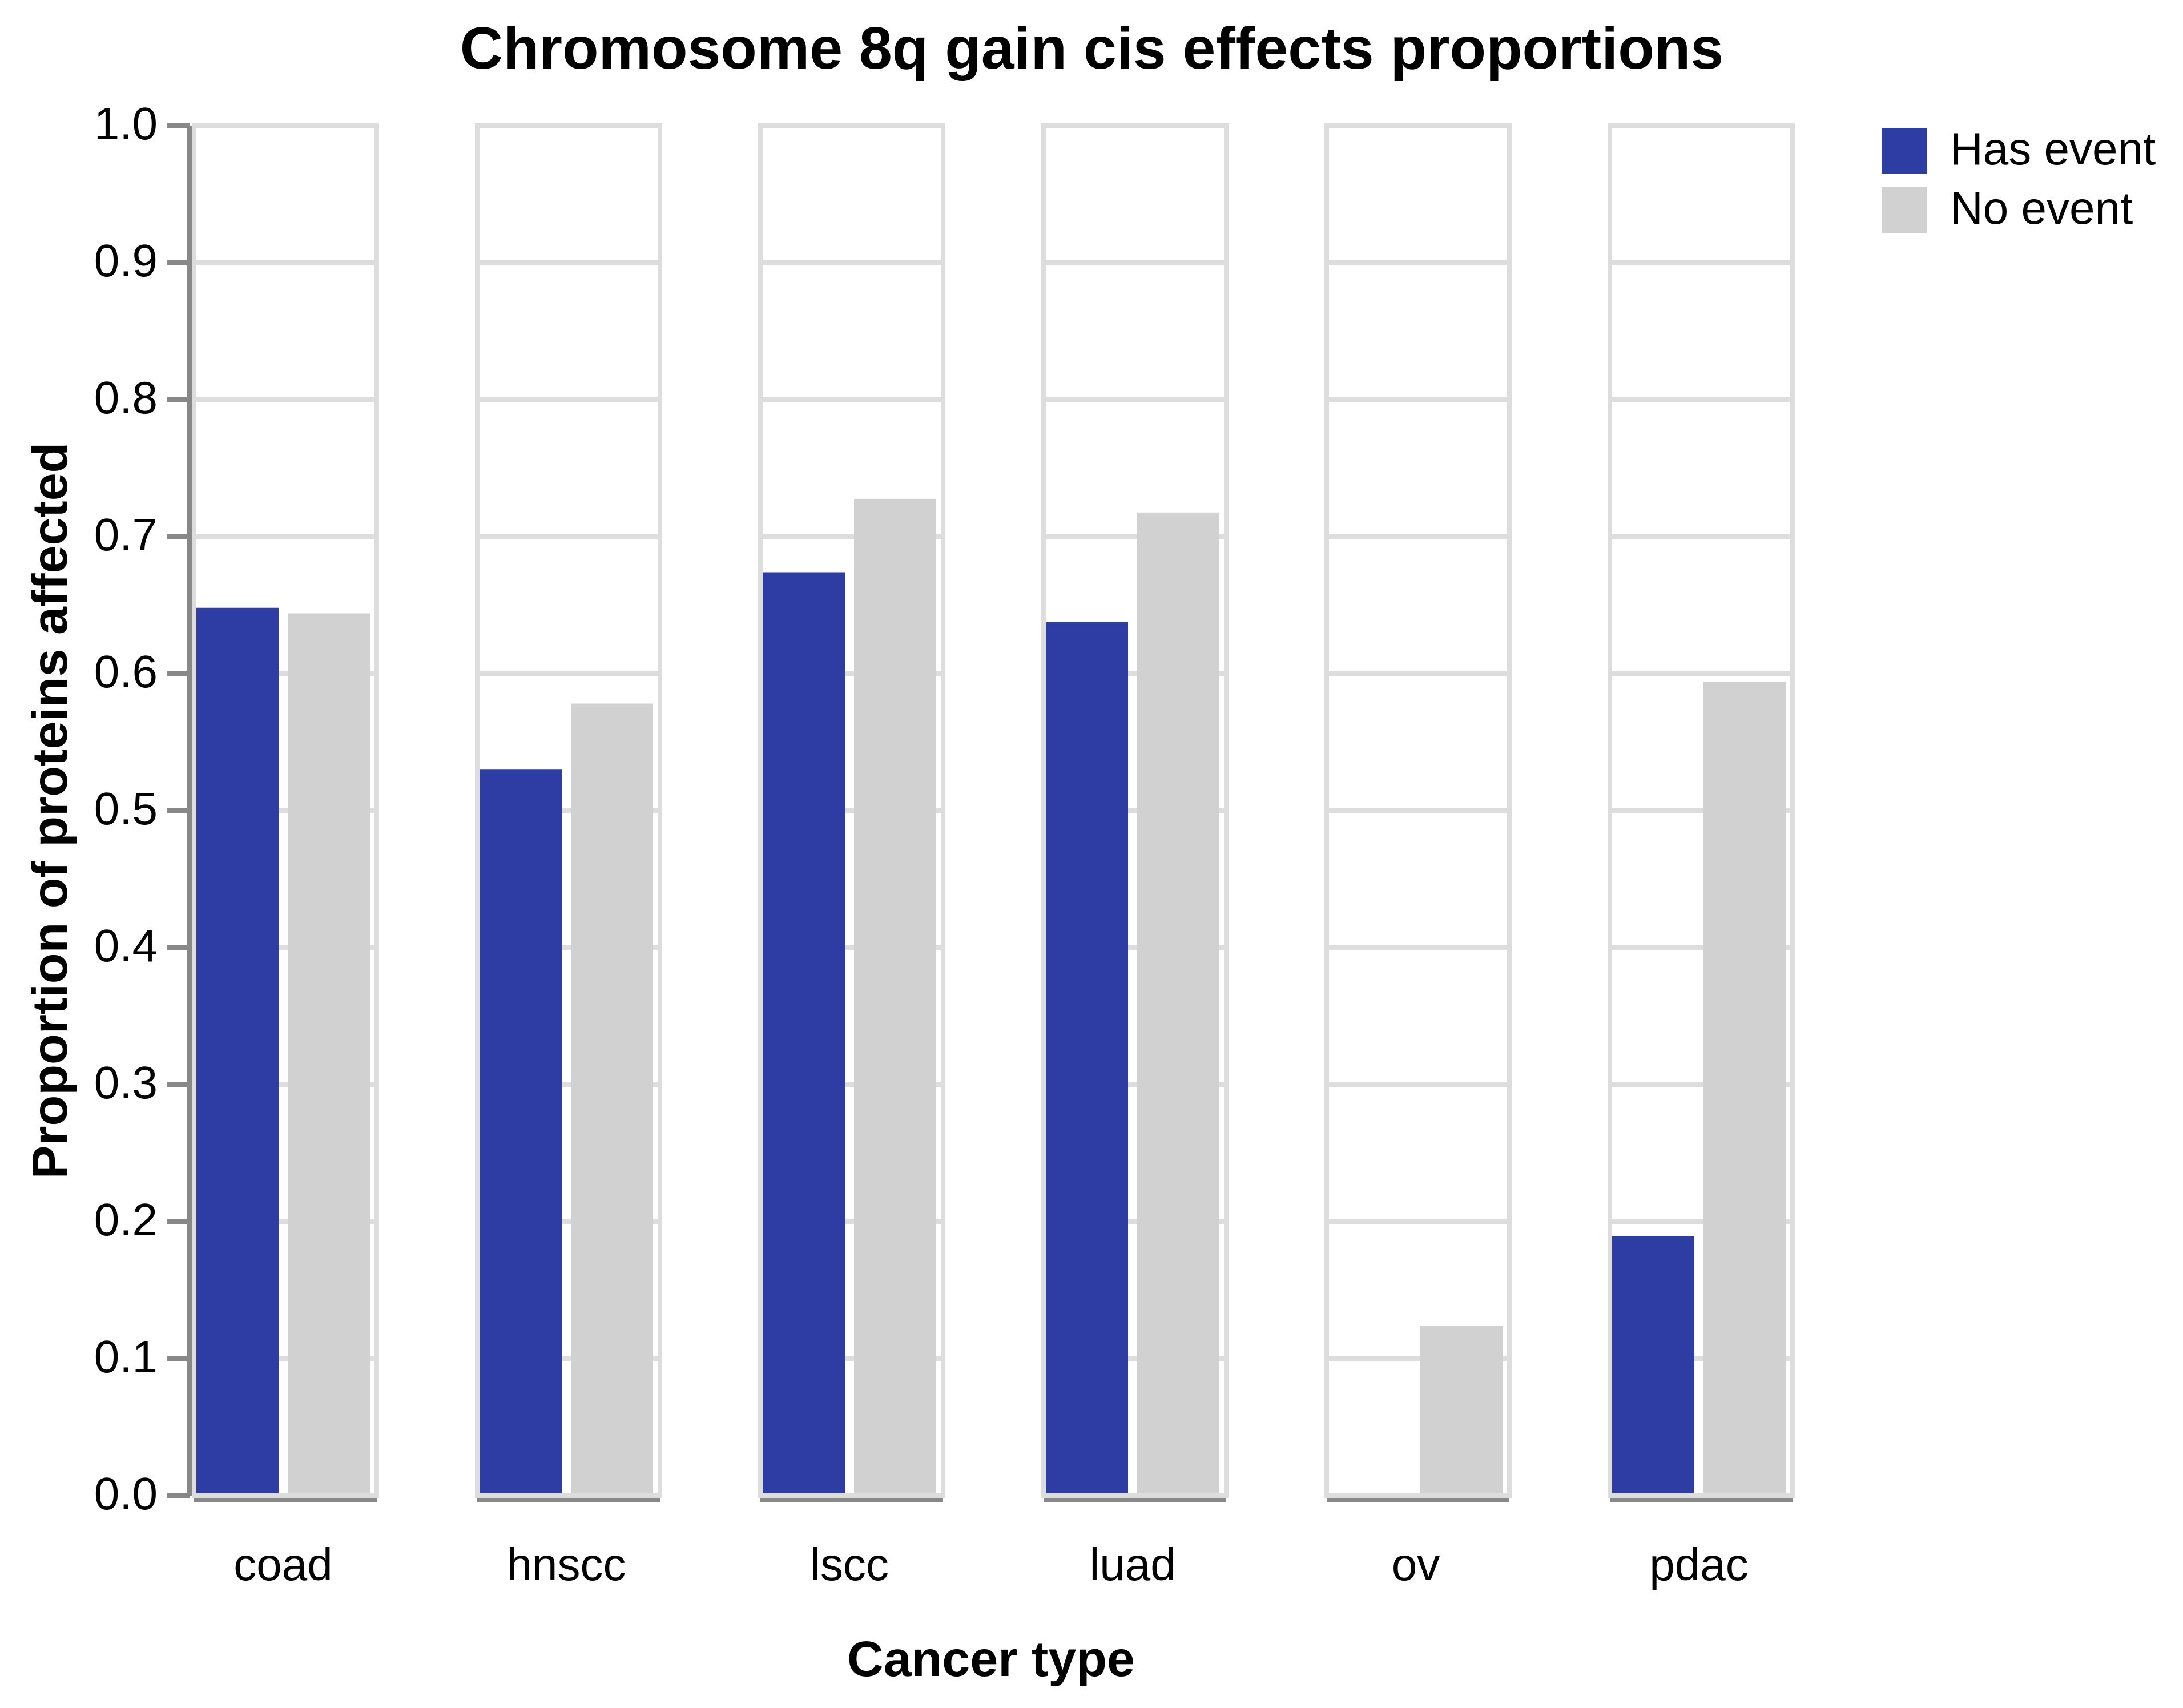

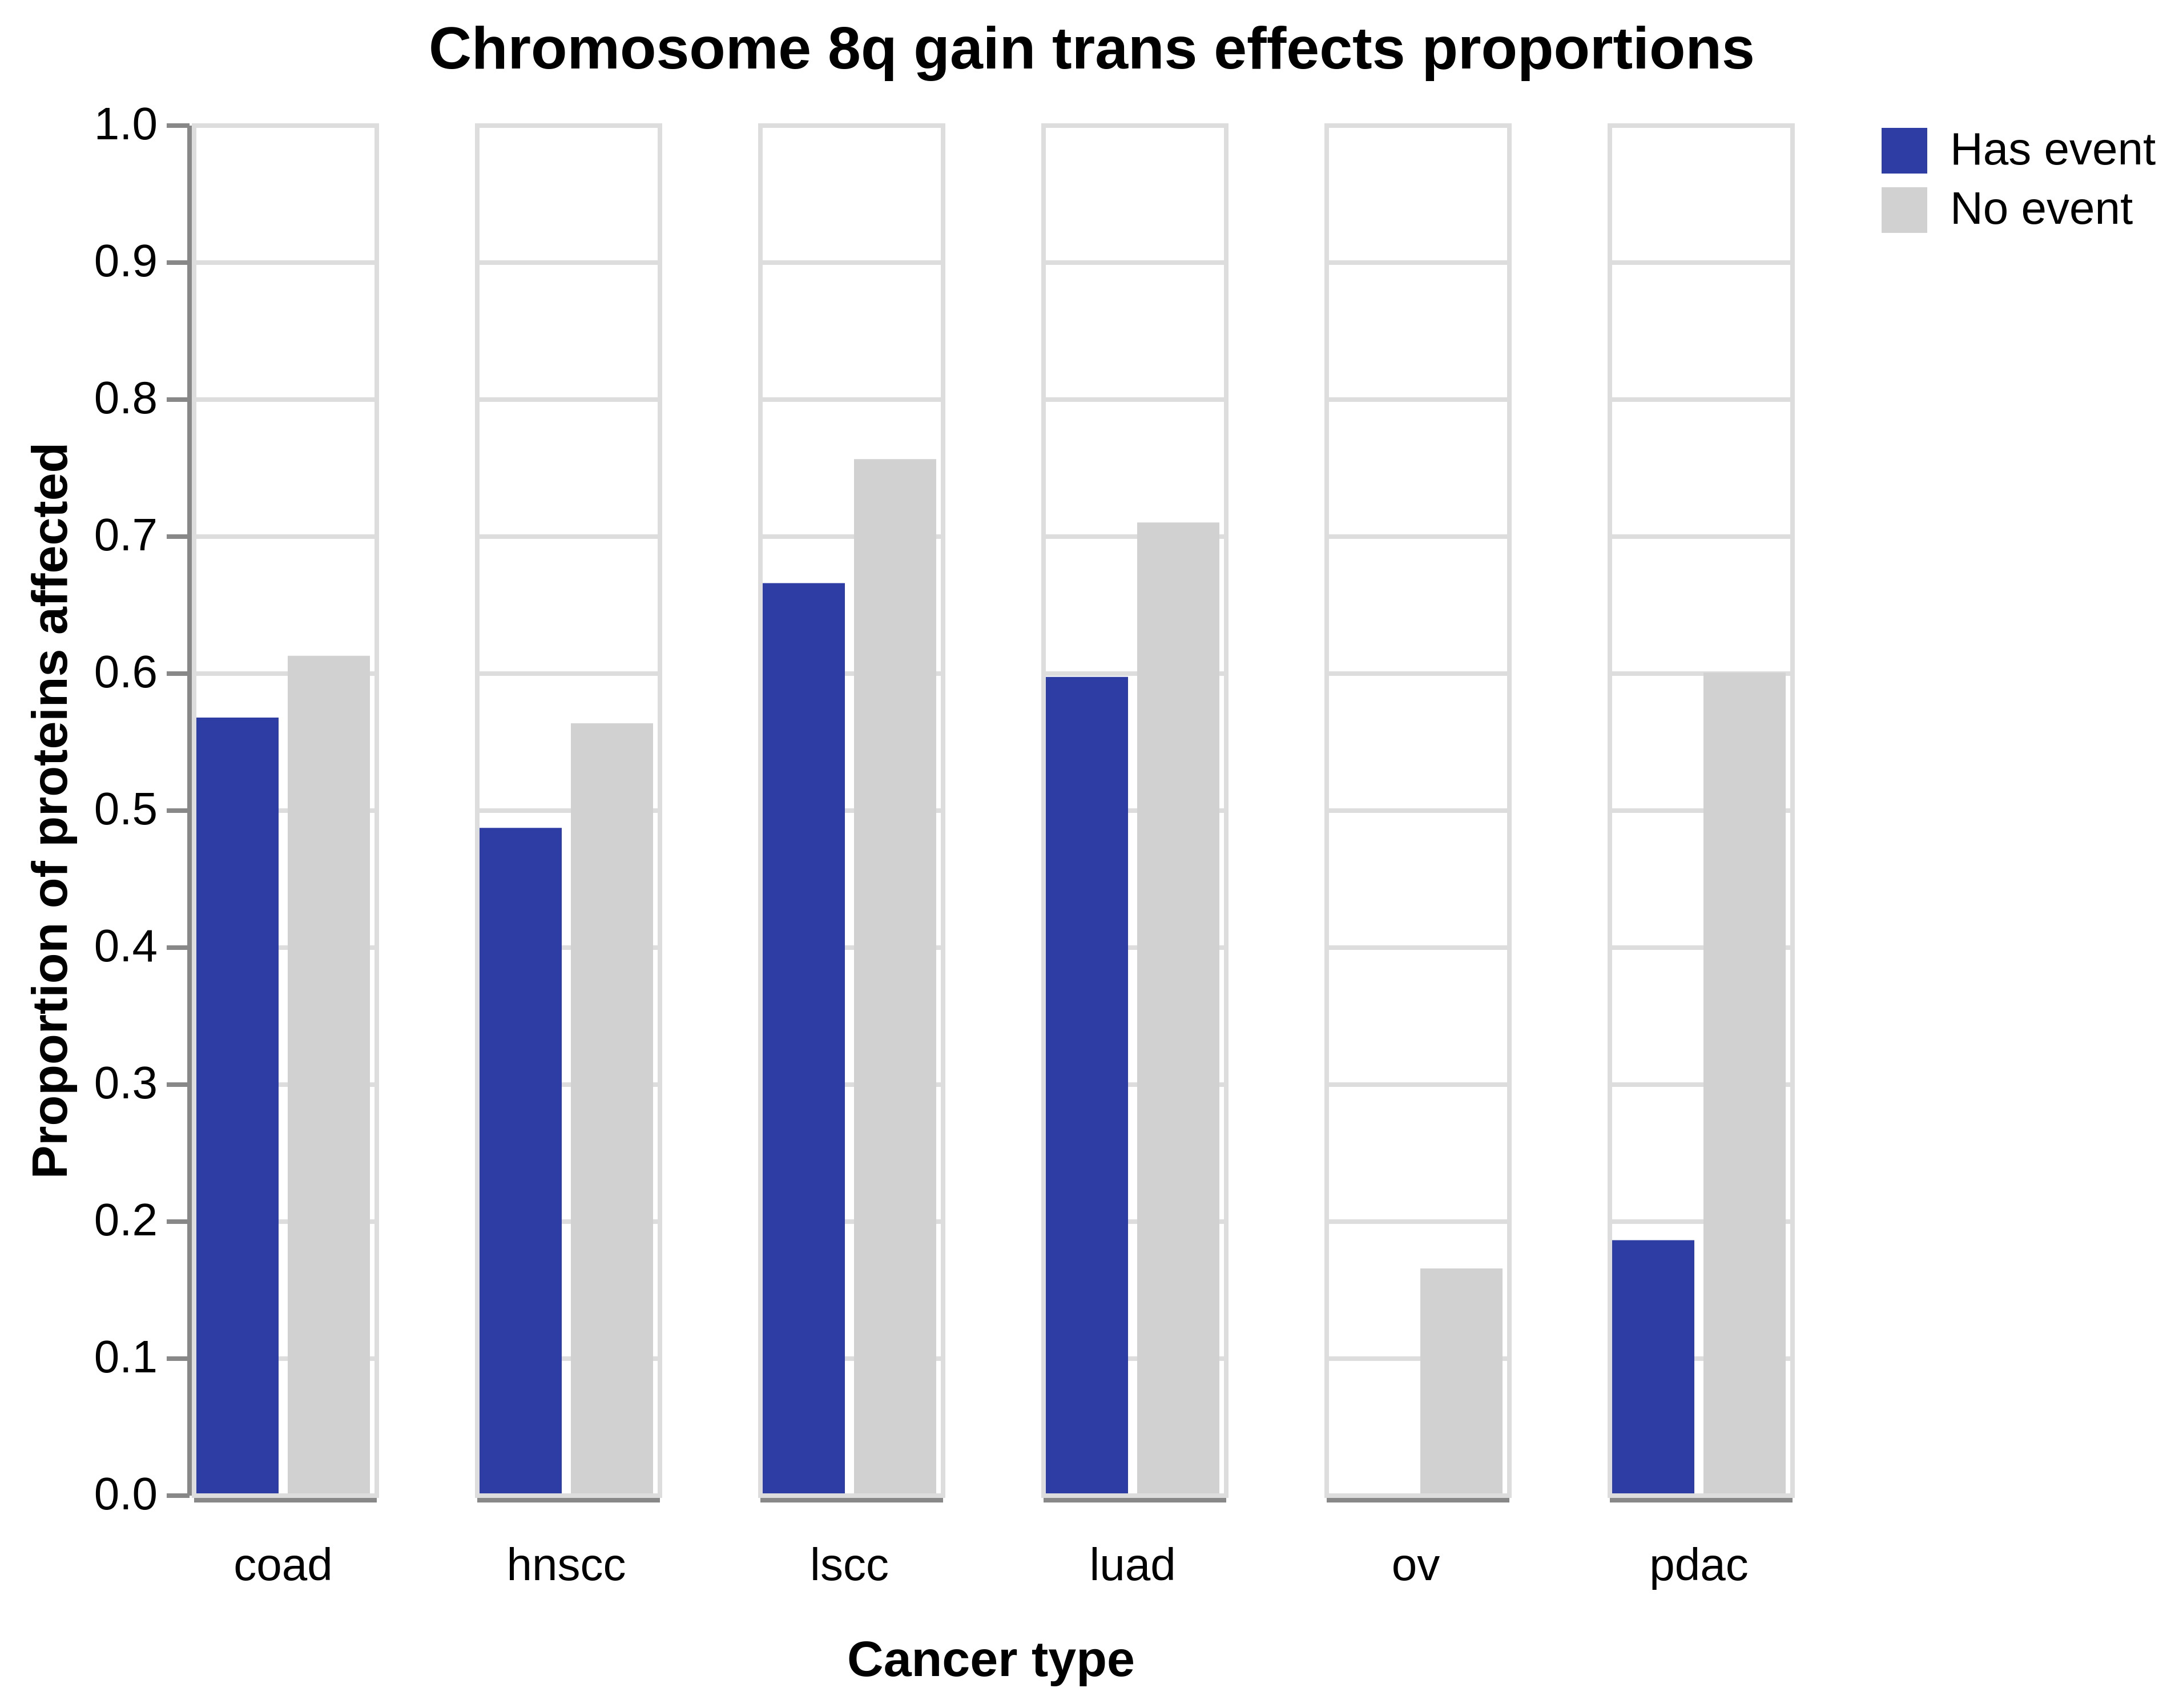

In [4]:
IPython.display.display(*[IPython.display.Image(path) for path in paths])